In [3]:
import pandas as pd
import numpy as np

df_t_loan=pd.read_csv('t_loan.csv')
df_t_loan_sum=pd.read_csv('t_loan_sum.csv')
df_t_order=pd.read_csv('t_order.csv')
df_t_user=pd.read_csv('t_user.csv')
df_t_click=pd.read_csv('t_click.csv')

In [4]:
df_t_loan.head()

,uid,loan_time,loan_amount,plannum
0,12135,2016-08-03 00:05:26,3.862595,1
1,41403,2016-08-03 00:13:25,5.584137,3
2,74458,2016-08-03 00:13:58,4.723017,1
3,12959,2016-08-03 00:19:33,3.862595,1
4,89641,2016-08-03 00:23:13,4.292651,1


In [28]:
len(df_t_loan['uid'].unique())

36697

In [75]:
len(set(df_t_loan['uid'].unique())-set(df_t_loan_sum['uid'].unique()))

17500

In [5]:
df_t_loan_sum.head()

,uid,month,loan_sum
0,34939,2016-11,6.316423
1,80338,2016-11,6.212631
2,5018,2016-11,6.153414
3,58005,2016-11,6.793132
4,52453,2016-11,4.292651


In [25]:
len(df_t_loan_sum['uid'].unique())

19197

In [27]:
df_t_loan_sum.shape

(19197, 3)

In [77]:
df_t_order.head()

,uid,buy_time,price,qty,cate_id,discount,total_price
0,45370,2016-11-23,3.995009,1,22,0.0,3.995009
1,66975,2016-11-23,3.269410,1,26,0.0,3.269410
2,75358,2016-11-23,2.255235,1,14,0.0,2.255235
3,40597,2016-11-23,1.635284,1,20,0.0,1.635284
4,83886,2016-11-23,1.920573,2,22,0.0,3.841145


In [76]:
df_t_order['total_price']=df_t_order['price']*df_t_order['qty']

In [98]:
date_min=df_t_order.buy_time.min()
date_max=df_t_order.buy_time.max()
def f(row):
    if row['buy_time']>'2016-11-01':
        val=4
    elif row['buy_time']>'2016-10-01':
        val=3
    elif row['buy_time']>'2016-09-01':
        val=2
    else:
        val=1
    return val
df_t_order['recent_flag']=df_t_order.apply(f, axis=1)
recency=df_t_order.groupby(['uid','cate_id'], as_index=False)['recent_flag'].max()

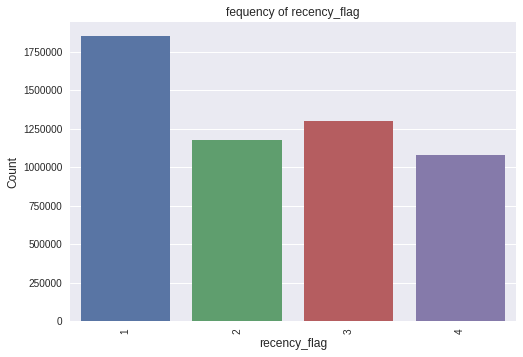

In [88]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x='recent_flag', data=df_t_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('recency_flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('fequency of recency_flag')
plt.show()

In [111]:
#calculate purchase frequency as per uid and cate_id
frequency=df_t_order.groupby(['uid', 'cate_id'], as_index=False)['buy_time'].count()
freq=frequency['buy_time'].drop_duplicates()
freq_band=pd.qcut(freq, 5)
freq_band=freq_band.drop_duplicates()

In [112]:
freq_band

0         (0.999, 81.8]
435       (81.8, 162.6]
1180     (162.6, 244.4]
1277     (244.4, 375.4]
5710    (375.4, 7467.0]
Name: buy_time, dtype: category
Categories (5, interval[float64]): [(0.999, 81.8] < (81.8, 162.6] < (162.6, 244.4] < (244.4, 375.4] < (375.4, 7467.0]]

In [114]:
#rate user as per purchase frequency band
def freq_flag(row):
    if row['buy_time']>350:
        val=5
    elif row['buy_time']>250:
        val=4
    elif row['buy_time']>150:
        val=3
    elif row['buy_time']>80:
        val=2
    elif row['buy_time']>0.5:
        val=1
    return val
frequency['freq_flag']=frequency.apply(freq_flag, axis=1)

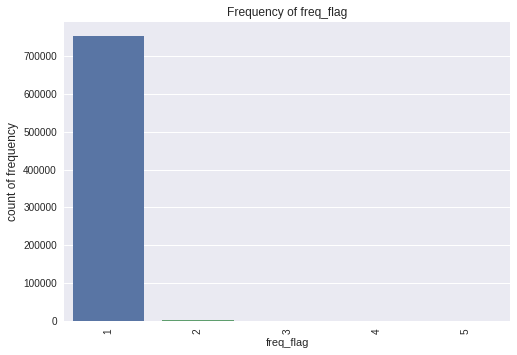

In [121]:
#check distribution of frequency flags
def countPlot(f, data):
    sns.countplot(x=f, data=data)
    plt.ylabel('count of frequency',fontsize=12)
    plt.xlabel(f)
    plt.xticks(rotation='vertical')
    plt.title('Frequency of freq_flag')
    return plt.show()
countPlot('freq_flag', frequency)
#most of the customers buy less than 81 times

In [164]:
money=df_t_order.groupby(['uid','cate_id'], as_index=False)['total_price'].sum()
unique_money=money[money['total_price']>0].drop_duplicates()
unique_money['monetary_band']=pd.qcut(unique_money['total_price'],10)
unique_money=unique_money[['monetary_band']].drop_duplicates()
unique_money.sort_values(by='monetary_band')

,monetary_band
29,"(0.00518, 3.024]"
3,"(3.024, 4.106]"
10,"(4.106, 5.723]"
6,"(5.723, 7.752]"
14,"(7.752, 10.583]"
1,"(10.583, 14.479]"
22,"(14.479, 20.449]"
16,"(20.449, 30.656]"
0,"(30.656, 54.716]"
2,"(54.716, 8603511.3]"


In [191]:
df_t_loan[df_t_loan['uid']==48222]

,uid,loan_time,loan_amount,plannum


In [187]:
df_t_order[df_t_order['total_price']>80000]

,uid,buy_time,price,qty,cate_id,discount,total_price,recent_flag
67438,48222,2016-10-14,2.436244,49950,26,0.0,121690.365742,3
110221,48222,2016-10-14,2.436244,49950,26,0.0,121690.365742,3
156344,48222,2016-10-18,2.436244,49950,26,0.0,121690.365742,3
213765,48222,2016-08-20,2.436244,49950,26,0.0,121690.365742,1
256827,48222,2016-11-18,2.436244,49950,26,0.0,121690.365742,4
306342,16032,2016-09-01,2.436244,99000,26,0.0,241188.112282,1
360912,48222,2016-08-20,2.436244,49950,26,0.0,121690.365742,1
480738,48222,2016-10-14,2.436244,44955,26,0.0,109521.329168,3
547431,49881,2016-08-05,2.436244,49940,26,0.0,121666.003306,1
590194,39013,2016-08-27,2.436244,79630,26,0.0,193998.074555,1


In [165]:
def money_flag(row):
    if row['total_price']>30000:
        val=10
    elif row['total_price']>20000:
        val=9
    elif row['total_price']>15000:
        val=8
    elif row['total_price']>10000:
        val=7
    elif row['total_price']>7000:
        val=6
    elif row['total_price']>5000:
        val=5
    elif row['total_price']>4000:
        val=4
    elif row['total_price']>3000:
        val=3
    elif row['total_price']>2000:
        val=2
    else:
        val=1
    return val
money['monetary_flag']=money.apply(money_flag, axis=1)

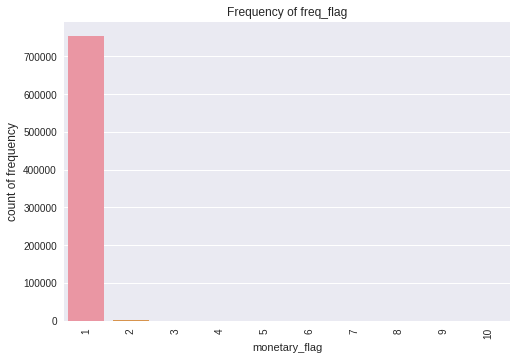

In [167]:
countPlot('monetary_flag', money)

In [161]:
#merge
df_t_order_all=pd.merge(recency, frequency, on=['uid','cate_id'], how='left')
df_t_order_all=pd.merge(df_t_order_all, money, on=['uid','cate_id'], how='left')

In [162]:
df_t_order_all.head()

,uid,cate_id,recent_flag,buy_freq,freq_flag,total_price,monetary_flag
0,1,1,3,4,1,39.410450,1
1,1,11,4,3,1,11.379929,1
2,1,15,4,19,1,57.879701,1
3,1,19,3,1,1,3.974636,1
4,1,20,4,4,1,12.446902,1


In [125]:
frequency.rename(columns={'buy_time':'buy_freq'}, inplace=True)

In [126]:
frequency.head()

,uid,cate_id,buy_freq,freq_flag
0,1,1,4,1
1,1,11,3,1
2,1,15,19,1
3,1,19,1,1
4,1,20,4,1


In [72]:
#buy count as per uid and cate_id
df_t_order.groupby(['uid','cate_id']).apply(lambda x:x['buy_time'].shape[0])

uid    cate_id
1      1           4
       11          3
       15         19
       19          1
       20          4
       22         22
       25          1
       35         13
       36          1
       40          1
2      2           1
       3           4
       11          2
       18          2
       21          2
       23          1
       33          9
       36          3
       44          2
3      2           4
       6           1
       10          3
       15          6
       21          1
       35          2
       36          1
       44          8
4      3           1
       13          3
       15          1
                  ..
90990  1          21
       6           4
       20          1
       21          1
       22          5
       26         19
       33          7
       40          2
       44         17
90991  26          1
       33          1
90992  1           8
       10          2
       11          7
       12          6
       19          

In [7]:
df_t_user.head()

,uid,age,sex,active_date,limit
0,26308,30,1,2016-02-16,5.974677
1,78209,40,1,2016-02-21,5.292154
2,51930,35,1,2016-04-19,6.292055
3,10113,25,1,2016-03-12,6.292055
4,17067,35,1,2016-02-16,5.974677


In [49]:
df_t_user.groupby(['sex','age'])['limit'].describe()

count      mean       std       min       25%       50%       75%  \
sex age                                                                        
1   20     102.0  5.363388  0.239675  5.292154  5.292154  5.292154  5.292154   
    25   12784.0  5.740385  0.374667  5.292154  5.292154  5.722768  5.974677   
    30   28212.0  5.883851  0.356665  5.292154  5.722768  5.974677  6.153414   
    35   21577.0  5.984442  0.328661  5.292154  5.722768  5.974677  6.292055   
    40   10400.0  6.012158  0.315117  5.292154  5.722768  6.153414  6.292055   
    45    3919.0  6.001346  0.315222  5.292154  5.722768  6.153414  6.292055   
    50    1411.0  5.999236  0.317902  5.292154  5.722768  6.153414  6.292055   
2   20      31.0  5.751750  0.444009  5.292154  5.292154  5.974677  6.222734   
    25    1668.0  5.724576  0.380107  5.292154  5.292154  5.722768  5.974677   
    30    4954.0  5.864643  0.364270  5.292154  5.722768  5.974677  6.153414   
    35    3653.0  5.938747  0.341603  5.292154  5.722768  5.974677  6.292055   
    40    1470.0  5.983339  0.331297  5.292154  5.722768  5.974677  6.292055   
    45     553.0  5.956529  0.339867  5.292154  5.722768  5.974677  6.292055   
    50     259.0  5.966560  0.314592  5.292154  5.722768  5.974677  6.292055   

              max  
sex age            
1   20   6.292055  
    25   6.292055  
    30   6.292055  
    35   6.292055  
    40   6.292055  
    45   6.292055  
    50   6.292055  
2   20   6.292055  
    25   6.292055  
    30   6.292055  
    35   6.292055  
    40   6.292055  
    45   6.292055  
    50   6.292055

In [8]:
df_t_click.head()

,uid,click_time,pid,param
0,12177,2016-10-04 12:22:30,1,19
1,29226,2016-10-04 12:18:42,6,1
2,37351,2016-10-04 12:18:41,10,16
3,82053,2016-10-04 12:18:16,1,40
4,82053,2016-10-04 12:18:46,1,40


In [32]:
type(df_t_click.click_time.values[0])

str

In [10]:
df_t_loan.isnull().sum()

uid            0
loan_time      0
loan_amount    0
plannum        0
dtype: int64

In [11]:
df_t_loan_sum.isnull().sum()

uid         0
month       0
loan_sum    0
dtype: int64

In [12]:
df_t_order.isnull().sum()

uid           0
buy_time      0
price       411
qty           0
cate_id       0
discount      0
dtype: int64

In [38]:
len(df_t_user.uid.unique())

90993

In [22]:
by_uid_click=df_t_click.groupby('uid')

78439

In [23]:
df_t_click.shape

(10933016, 4)

In [24]:
import datetime
def epoch_time(date_str, date_format='%Y-%m-%d %H:%M:%S'):
    return int(datetime.datetime.strptime(date_str, date_format).strftime("%s"))

def click_aggr(group):
    click_num_all = group.shape[0]
    click_num_day=group['click_time']
    click_num_week=
    click_num_month=
    loginfo_LogInfo1_unique_num = group[''].unique().shape[0]
    loginfo_active_day_num = group[''].unique().shape[0]
    min_day = epoch_time(np.min(group['click_time']))
    max_day = epoch_time(np.max(group['click_time']))
    gap_day = round((max_day[0] - min_day[0]) / 86400)

    indexes = {
        'click_num_all': click_num_all, 
        'click_num_day': loginfo_LogInfo1_unique_num, 
        'click_num_week': loginfo_active_day_num, 
        'click_num_month': gap_day, 
        'recent_click_day': max_day
    }
    
    # TODO every individual LogInfo1,LogInfo2 count

    def sub_aggr_loginfo(sub_group):
        return sub_group.shape[0]

    sub_group = group.groupby(by=['LogInfo1', 'LogInfo2']).apply(sub_aggr_loginfo)
    indexes['loginfo_LogInfo12_unique_num'] = sub_group.shape[0]
    return Series(data=[indexes[c] for c in indexes], index=[c for c in indexes])
    
df_t_click['click_date']=df_t_click.apply(lambda x: x.split()[0])
df_click_grouped = df_t_click.groupby(by=['uid']).apply(click_aggr)
df_click_grouped.head()

ModuleNotFoundError: No module named 'arrow'

In [74]:
df_t_click.groupby(['uid','pid']).apply(lambda x:x['click_time'].shape[0])

uid    pid
1      5        2
       6        2
       8       70
       9        1
       10      18
4      1       35
       2        1
       3        1
       4        2
       5        3
       6        1
       7       12
       8       24
       9       13
       10      70
5      4        2
       5        1
       8        7
       10       4
6      4        7
       5        7
       6        1
       7        7
       8        2
       9        4
       10     186
7      2        5
       4        1
       5        1
       7        1
             ... 
90989  3       28
       8       42
       9       18
       10     133
90990  2       14
       4       43
       5       32
       6        1
       7       48
       8       45
       10      39
90991  1        1
       4        2
       5        3
       6        1
       8        4
       10      18
90992  4        1
       5        3
       6        9
       7        5
       8       53
       10     135
90993  1        1

In [66]:
indexes={'a':2,'b':3}
pd.Series(data=[indexes[c] for c in indexes], index=[c for c in indexes])

a    2
b    3
dtype: int64

In [69]:
'2016-08-10 09:11:32'.split()[0]

'2016-08-10'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#make a classification model and accessing performance
def classification_model(model, data, features, outcome):
    model.fit(data[features], data[outcome])
    predictions=model.predict(data[features])
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print('accuracy: %s' % '{0:.3%}'.format(accuracy))
    
    #k-fold cross-validation with 5 folds
    kf=KFold(data.shape[0],n_folds=5)
    error=[]
    for train, test in kf:
        train_features=(data[features].iloc[train,:])
        train_target=data[outcome].iloc[train]
        model.fit(train_features, train_target)
        error.append(model.score(data[features].iloc[test,:], data[outcome].iloc[test]))
    print('cross validation score: %s' % '{0:.3%}'.format(np.mean(error)))
    #fit the model again to be referred outside the function
    model.fit(data[features], data[outcome])
    
model=LogisticRegression()
features=['credit']
classification_model(model, features, 'loan')